In [ ]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers torch pandas seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=8a7cec578ee049c893a4455353119bbb005f0e7644a9d4fd3d7904b6c86fe792
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/ner_final.csv")

df.head()


,Standard_Nepali (Source),Entities (Nepali)
0,प्रधानमन्त्री केपी शर्मा ओलीले सिंहदरबारमा नया...,"केपी शर्मा ओली (PER), सिंहदरबार (LOC)"
1,नेपाल सरकारले आर्थिक वर्ष २०२६/२७ का लागि बजेट...,"नेपाल (LOC), २०२६/२७ (DATE)"
2,काठमाडौँ महानगरपालिकाले दरबारमार्ग क्षेत्रमा स...,"काठमाडौँ महानगरपालिका (ORG), दरबारमार्ग (LOC)"
3,नेपाली कांग्रेसले बुटवलमा आयोजना गरेको कार्यक्...,"नेपाली कांग्रेस (ORG), बुटवल (LOC)"
4,गृहमन्त्री रवि लामिछानेले चितवनमा सुरक्षा अवस्...,"रवि लामिछाने (PER), चितवन (LOC)"


In [ ]:
def convert_to_bio(sentence, entity_string):
    tokens = sentence.split()
    bio_labels = ["O"] * len(tokens)

    if pd.isna(entity_string):
        return tokens, bio_labels

    entities = entity_string.split(",")

    for entity in entities:
        entity = entity.strip()
        if "(" not in entity:
            continue

        name, label = entity.split("(")
        name = name.strip()
        label = label.replace(")", "").strip()

        name_tokens = name.split()
        n = len(name_tokens)

        for i in range(len(tokens)):
            match = True

            # Check each token in entity
            for j in range(n):
                if i + j >= len(tokens):
                    match = False
                    break

                # Allow suffix for the last token
                if j == n - 1:
                    if not tokens[i + j].startswith(name_tokens[j]):
                        match = False
                        break
                else:
                    if tokens[i + j] != name_tokens[j]:
                        match = False
                        break

            if match:
                bio_labels[i] = "B-" + label
                for j in range(1, n):
                    bio_labels[i + j] = "I-" + label

    return tokens, bio_labels
sentences = []
true_labels = []

for _, row in df.iterrows():
    tokens, labels = convert_to_bio(row["Standard_Nepali (Source)"], row["Entities (Nepali)"])
    sentences.append(tokens)
    true_labels.append(labels)

print(sentences[1])
print(true_labels[1])



['नेपाल', 'सरकारले', 'आर्थिक', 'वर्ष', '२०२६/२७', 'का', 'लागि', 'बजेट', 'प्रस्तुत', 'गरेको', 'छ।']
['B-LOC', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
import pandas as pd

# Convert tokens and labels to space-joined strings
df_save = pd.DataFrame({
    "tokens": [" ".join(tokens) for tokens in sentences],
    "labels": [" ".join(labels) for labels in true_labels]
})

df_save.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset/ner_conv_final.csv", index=False)
print("Saved tokenized BIO data to ner_conv_final.csv")


Saved tokenized BIO data to ner_conv_final.csv


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/ner_conv_final.csv")

df.head()

,tokens,labels
0,प्रधानमन्त्री केपी शर्मा ओलीले सिंहदरबारमा नया...,O B-PER I-PER I-PER B-LOC O O O O O O
1,नेपाल सरकारले आर्थिक वर्ष २०२६/२७ का लागि बजेट...,B-LOC O O O B-DATE O O O O O O
2,काठमाडौँ महानगरपालिकाले दरबारमार्ग क्षेत्रमा स...,B-ORG I-ORG B-LOC O O O O O O O
3,नेपाली कांग्रेसले बुटवलमा आयोजना गरेको कार्यक्...,B-ORG I-ORG B-LOC O O O O O O O O O
4,गृहमन्त्री रवि लामिछानेले चितवनमा सुरक्षा अवस्...,O B-PER I-PER B-LOC O O O O O


config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/709M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

Precision: 0.7427937915742794
Recall: 0.6046931407942239
F1 Score: 0.6666666666666666
Accuracy: 0.8472222222222222

Detailed Report:

              precision    recall  f1-score   support

        DATE       0.37      0.88      0.52         8
         LOC       0.85      0.58      0.69       337
        MISC       0.29      0.67      0.40         3
         ORG       0.56      0.69      0.62        89
         PER       0.81      0.59      0.68       117

   micro avg       0.74      0.60      0.67       554
   macro avg       0.57      0.68      0.58       554
weighted avg       0.78      0.60      0.67       554

Labels: ['B-DATE', 'B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-DATE', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O']


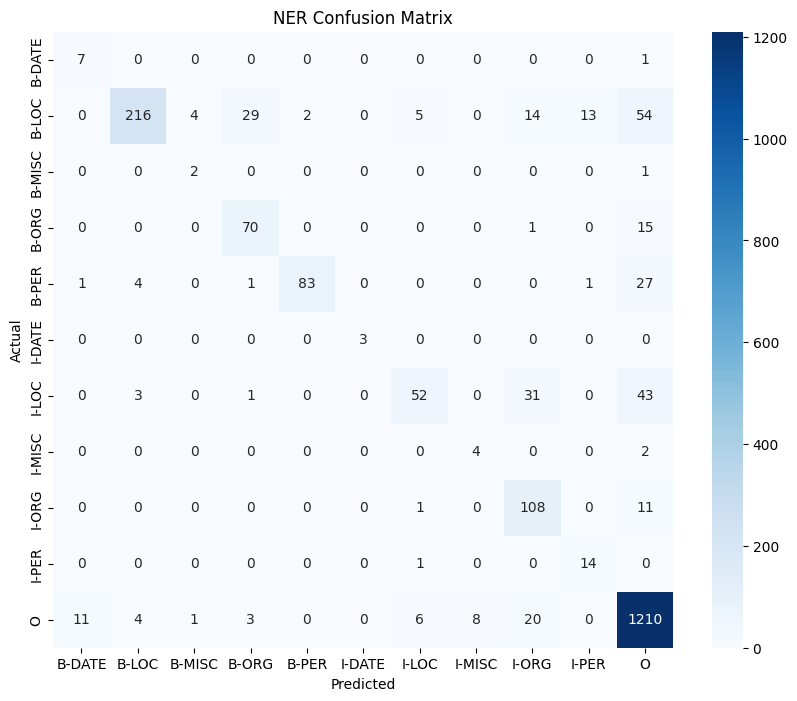

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
from seqeval.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Nepali NER model
# model_name = "xlm-roberta-base"
model_name= "Saugatkafley/mbert-Nepali-NER"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
model.eval()  # evaluation mode

def predict_ner(tokens):
    encoding = tokenizer(tokens,
                         is_split_into_words=True,
                         return_tensors="pt",
                         truncation=True)

    with torch.no_grad():
        outputs = model(**encoding)

    predictions = torch.argmax(outputs.logits, dim=2)
    predicted_labels = []

    word_ids = encoding.word_ids()
    previous_word_idx = None

    for idx, word_idx in enumerate(word_ids):
        if word_idx is None:
            continue
        if word_idx != previous_word_idx:
            label_id = predictions[0][idx].item()
            label = model.config.id2label[label_id]
            predicted_labels.append(label)
        previous_word_idx = word_idx

    return predicted_labels

def standardize_labels(labels_list):
    # Mapping from model's predicted labels to dataset's labels
    label_map = {
        'B-Person': 'B-PER',
        'I-Person': 'I-PER',
        'B-Location': 'B-LOC',
        'I-Location': 'I-LOC',
        'B-Organization': 'B-ORG',
        'I-Organization': 'I-ORG',
        'B-Date': 'B-DATE',
        'I-Date': 'I-DATE',
        'B-Event': 'B-MISC', # Assuming Event falls under MISC if not explicitly in true_labels
        'I-Event': 'I-MISC'

    }
    return [label_map.get(label, label) for label in labels_list]

# Load the processed data (assuming it's in the current environment or re-loaded)
# If sentences and true_labels are not in the current environment, you would need to re-run the data loading and processing steps.
# For this combined cell, I'll assume `sentences` and `true_labels` are available from previous executions.

# Placeholder for sentences and true_labels if running this cell independently
# If you run this cell in a fresh environment, you'll need to load these first.
# For example:
# df = pd.read_csv("/content/drive/MyDrive/Classroom/Dataset/achhami_translated_ner.csv")
# sentences = [s.split() for s in df['tokens']]
# true_labels = [l.split() for l in df['labels']]


all_pred = []
all_true = []

for tokens, labels in zip(sentences, true_labels):
    preds = predict_ner(tokens)
    # Standardize predicted labels
    preds = standardize_labels(preds)

    # Ensure lengths match
    min_len = min(len(preds), len(labels))
    all_pred.append(preds[:min_len])
    all_true.append(labels[:min_len])

# Metrics
print("Precision:", precision_score(all_true, all_pred))
print("Recall:", recall_score(all_true, all_pred))
print("F1 Score:", f1_score(all_true, all_pred))
print("Accuracy:", accuracy_score(all_true, all_pred))

print("\nDetailed Report:\n")
print(classification_report(all_true, all_pred))

# Flatten token lists
flat_true = [label for seq in all_true for label in seq]
flat_pred = [label for seq in all_pred for label in seq]

# Optional: see unique labels
labels = list(set(flat_true + flat_pred))
labels.sort()  # for consistent ordering
print("Labels:", labels)

cm = confusion_matrix(flat_true, flat_pred, labels=labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NER Confusion Matrix")
plt.show()